In [1]:
import os
import numpy as np
import pandas as pd
from scipy.stats import skew, kurtosis
import cv2
import glob
import tifffile as tiff
import matplotlib.pyplot as plt

In [2]:
image_list = []
code = []

for filename in glob.glob('L_MPA/*.tiff'):
    img = tiff.imread(filename)
    image_list.append(img)
    code.append(os.path.basename(filename).split('.tiff')[0])
    print(filename)
    

L_MPA\ADM001_Tmap_T15_L_MPA.tiff
L_MPA\ADM004_Tmap_T15_L_MPA.tiff
L_MPA\CTA002_Tmap_T15_L_MPA.tiff
L_MPA\CTA003_Tmap_T15_L_MPA.tiff
L_MPA\CTA004_Tmap_T15_L_MPA.tiff
L_MPA\ESP001_Tmap_T15_L_MPA.tiff
L_MPA\ESP002_Tmap_T15_L_MPA.tiff
L_MPA\ESP003_Tmap_T15_L_MPA.tiff
L_MPA\ESP006_Tmap_T15_L_MPA.tiff
L_MPA\ESP008_Tmap_T15_L_MPA.tiff
L_MPA\ESP009_Tmap_T15_L_MPA.tiff
L_MPA\ESP010_Tmap_T15_L_MPA.tiff
L_MPA\ESP011_Tmap_T15_L_MPA.tiff
L_MPA\EST004_Tmap_T15_L_MPA.tiff
L_MPA\EXT003_Tmap_T15_L_MPA.tiff
L_MPA\MED001_Tmap_T15_L_MPA.tiff
L_MPA\MED002_Tmap_T15_L_MPA.tiff
L_MPA\MED006_Tmap_T15_L_MPA.tiff
L_MPA\NRT001_Tmap_T15_L_MPA.tiff
L_MPA\NRT002_Tmap_T15_L_MPA.tiff
L_MPA\NRT003_Tmap_T15_L_MPA.tiff
L_MPA\NRT004_Tmap_T15_L_MPA.tiff


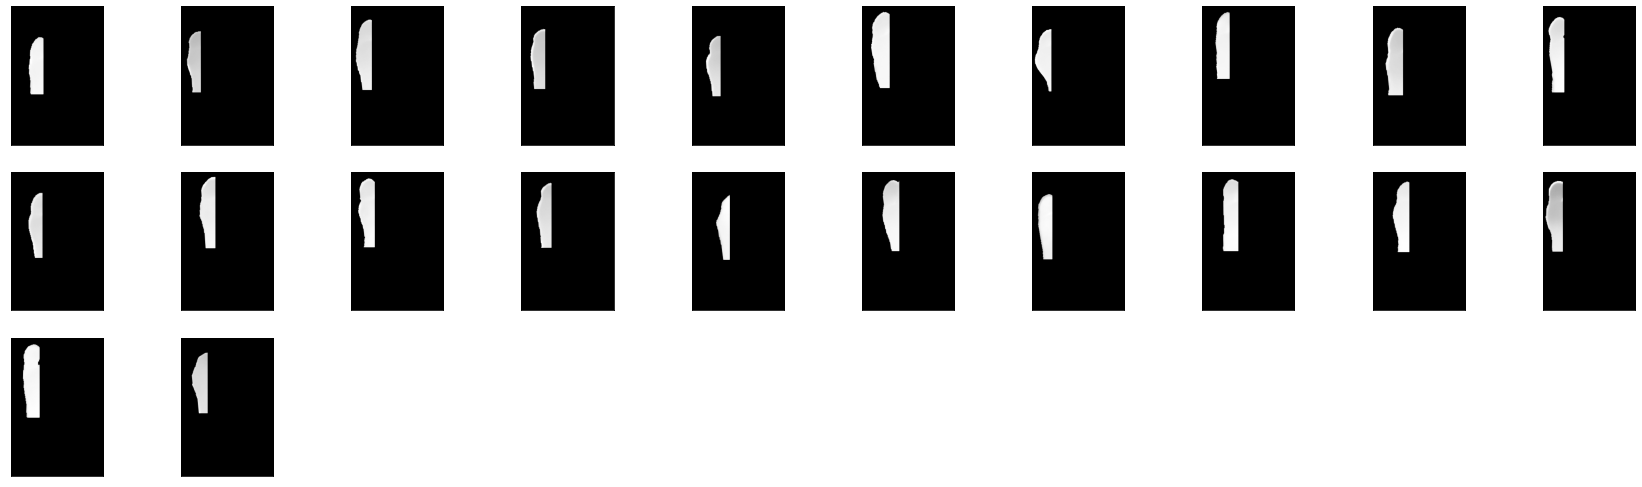

In [3]:
# Plot image for checking purposes
# Specify the overall grid size
plt.figure(figsize=(30,30)) 

for i in range(len(image_list)):
    # The number of images in the grid is 22 distributed in a 10 by 10 matrix
    plt.subplot(10,10,i+1)    
    plt.imshow(image_list[i], cmap=plt.cm.Greys_r)
    plt.xticks([])
    plt.yticks([])
plt.show()

In [4]:
# Extract mean value for each angiosome on each image
# Define list in which data will be stored
L_MPA_mean = []
L_MPA_std = []
L_MPA_max = []
L_MPA_min = []
L_MPA_skew = []
L_MPA_kurtosis = []
L_MPA_img = []

subject = []

for i in range(len(image_list)):
    # Save image as array
    img = np.asarray(image_list[i][image_list[i] > 0])
    L_MPA_img.append(img)
    # Mean value
    img_mean = np.mean(image_list[i][image_list[i] > 0])   
    L_MPA_mean.append(img_mean)
    # Standard deviation 
    img_std = np.std(image_list[i][image_list[i] > 0])   
    L_MPA_std.append(img_std)
    # Maximum value
    img_max = np.max(image_list[i][image_list[i] > 0])   
    L_MPA_max.append(img_max)
    # Minimum value
    img_min = np.min(image_list[i][image_list[i] > 0])   
    L_MPA_min.append(img_min)
    # Skew
    img_skew = skew(image_list[i][image_list[i] > 0])   
    L_MPA_skew.append(img_skew)
    # Kurtosis
    img_kurtosis = kurtosis(image_list[i][image_list[i] > 0])   
    L_MPA_kurtosis.append(img_kurtosis)
    # Subject
    subject.append(code[i])
    print(subject[i], L_MPA_mean[i], L_MPA_std[i], L_MPA_max[i], L_MPA_min[i], L_MPA_skew[i], L_MPA_kurtosis[i])   


ADM001_Tmap_T15_L_MPA 27.40965 3.5902033 30.800222 0.07650252 -5.467538704765174 31.43592516621132
ADM004_Tmap_T15_L_MPA 20.062502 3.0579154 29.251656 0.10649239 -3.1904908256821414 16.026651570074723
CTA002_Tmap_T15_L_MPA 23.59699 3.2715495 29.785744 0.13560343 -4.479297024267892 24.337682084752487
CTA003_Tmap_T15_L_MPA 23.1163 3.5334816 31.587933 0.11072725 -2.809706834873843 15.202847643213865
CTA004_Tmap_T15_L_MPA 20.92821 3.3089185 27.949995 0.45154062 -2.6548443120436187 12.818312498543271
ESP001_Tmap_T15_L_MPA 25.80345 3.335294 29.048943 0.05400996 -5.2515928285654825 30.549220597626864
ESP002_Tmap_T15_L_MPA 25.547192 3.8346364 29.572845 0.27236387 -4.6643426053258406 22.837828171321338
ESP003_Tmap_T15_L_MPA 27.879904 3.8819666 31.645554 0.1252363 -4.964370242675352 26.4654721798829
ESP006_Tmap_T15_L_MPA 23.10751 3.3670783 29.914864 0.05262152 -3.2682170149902707 17.13502149297444
ESP008_Tmap_T15_L_MPA 24.381119 3.7749643 28.199913 0.12384785 -3.5185501919104483 16.4338113570036

In [5]:
# Initialize data of lists
data = {'Subject': subject,
        'L_MPA_mean': L_MPA_mean, 
        'L_MPA_std': L_MPA_std,
        'L_MPA_max': L_MPA_max,
        'L_MPA_min': L_MPA_min,
        'L_MPA_skew': L_MPA_skew,
        'L_MPA_kurtosis': L_MPA_kurtosis}
  
# Create DataFrame
df = pd.DataFrame(data)
display(df)

df.to_csv('L_MPA.csv', index=False) 

,Subject,L_MPA_mean,L_MPA_std,L_MPA_max,L_MPA_min,L_MPA_skew,L_MPA_kurtosis
0,ADM001_Tmap_T15_L_MPA,27.409651,3.590203,30.800222,0.076503,-5.467539,31.435925
1,ADM004_Tmap_T15_L_MPA,20.062502,3.057915,29.251656,0.106492,-3.190491,16.026652
2,CTA002_Tmap_T15_L_MPA,23.596991,3.271549,29.785744,0.135603,-4.479297,24.337682
3,CTA003_Tmap_T15_L_MPA,23.116301,3.533482,31.587933,0.110727,-2.809707,15.202848
4,CTA004_Tmap_T15_L_MPA,20.928209,3.308918,27.949995,0.451541,-2.654844,12.818312
5,ESP001_Tmap_T15_L_MPA,25.803450,3.335294,29.048943,0.054010,-5.251593,30.549221
6,ESP002_Tmap_T15_L_MPA,25.547192,3.834636,29.572845,0.272364,-4.664343,22.837828
7,ESP003_Tmap_T15_L_MPA,27.879904,3.881967,31.645554,0.125236,-4.964370,26.465472
8,ESP006_Tmap_T15_L_MPA,23.107510,3.367078,29.914864,0.052622,-3.268217,17.135021
9,ESP008_Tmap_T15_L_MPA,24.381119,3.774964,28.199913,0.123848,-3.518550,16.433811


In [6]:
# Total values for this angiosome
# Concatenate all data for extracting parameters
L_MPA_all = np.concatenate((L_MPA_img[0],L_MPA_img[1],L_MPA_img[2],L_MPA_img[3],L_MPA_img[4],L_MPA_img[5],
                            L_MPA_img[6],L_MPA_img[7],L_MPA_img[8],L_MPA_img[9],L_MPA_img[10],L_MPA_img[11],
                            L_MPA_img[12],L_MPA_img[13],L_MPA_img[14],L_MPA_img[15],L_MPA_img[16],L_MPA_img[17],
                            L_MPA_img[18],L_MPA_img[19],L_MPA_img[20],L_MPA_img[21]))
L_MPA_all_mean = np.mean(L_MPA_all)
L_MPA_all_std = np.std(L_MPA_all)
L_MPA_all_max = np.max(L_MPA_all)
L_MPA_all_min = np.min(L_MPA_all)
L_MPA_all_skew = skew(L_MPA_all)
L_MPA_all_kurtosis = kurtosis(L_MPA_all)


# Initialize data of lists
data2 = {'Variables':['L_MPA_all_mean', 'L_MPA_all_std', 'L_MPA_all_max', 'L_MPA_all_min', 'L_MPA_all_skew', 
                      'L_MPA_all_kurtosis'],
         'Values': [L_MPA_all_mean, L_MPA_all_std, L_MPA_all_max, L_MPA_all_min, L_MPA_all_skew, L_MPA_all_kurtosis]}
  
# Create DataFrame
df2 = pd.DataFrame(data2)
display(df2)

df2.to_csv('L_MPA_all.csv', index=False) 


,Variables,Values
0,L_MPA_all_mean,24.563906
1,L_MPA_all_std,4.320629
2,L_MPA_all_max,32.342205
3,L_MPA_all_min,0.052622
4,L_MPA_all_skew,-2.236675
5,L_MPA_all_kurtosis,8.404479


In [7]:
a_file = open("L_MPA.txt", "w")
np.savetxt(a_file, L_MPA_all)
a_file.close()